In [1]:
from NonHolonomicTrajectory import NonHolonomicTrajectory
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)


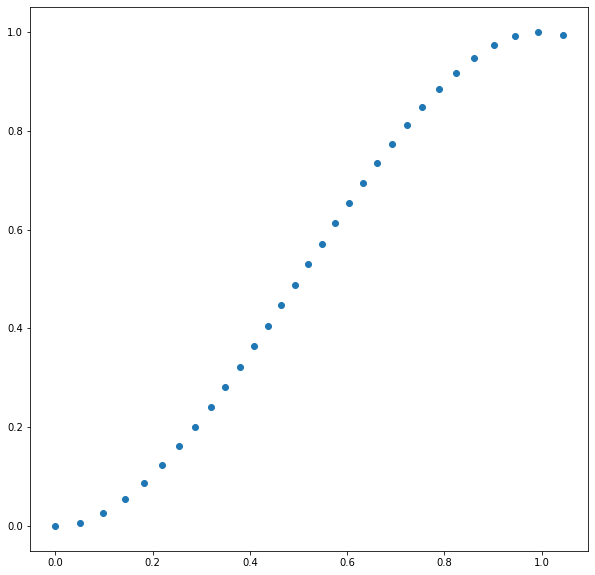

In [2]:
InitialPose = [0,0,0]
FinalPose = [1,1,0] 
Step = 0.05
v_t, w_t = NonHolonomicTrajectory(InitialPose,FinalPose,LinearVelocity = 1,Step = Step)
t = Step*np.arange(0,len(v_t))


Text(0.5, 0, 'tempo [s]')

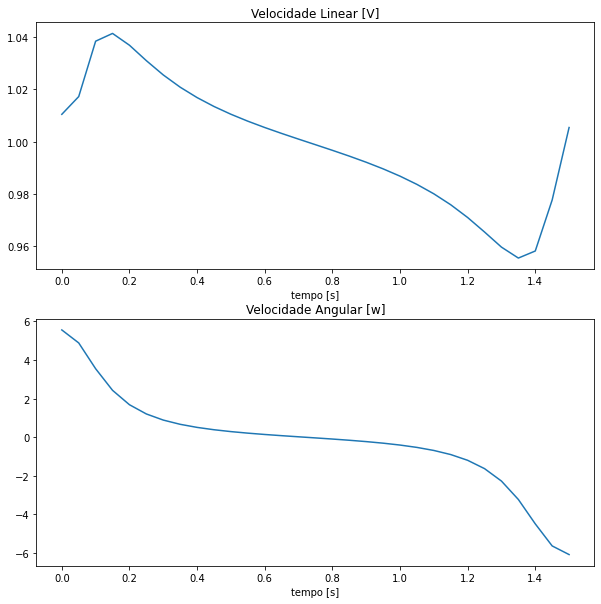

In [3]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(t,v_t)
ax1.set_title('Velocidade Linear [V]')
ax1.set_xlabel('tempo [s]')
ax2.plot(t,w_t, label='Velocidade Angular')
ax2.set_title('Velocidade Angular [w]')
ax2.set_xlabel('tempo [s]')





In [4]:
from ToAngularWheelVelocity import ToAngularWheelVelocity

In [5]:
AngularVelocities = ToAngularWheelVelocity(v_t,w_t)
VelocidadeAngularRodaDireita = AngularVelocities[0,:]
VelocidadeAngularRodaEsquerda = AngularVelocities[1,:]

Text(0.5, 0, 'tempo [s]')

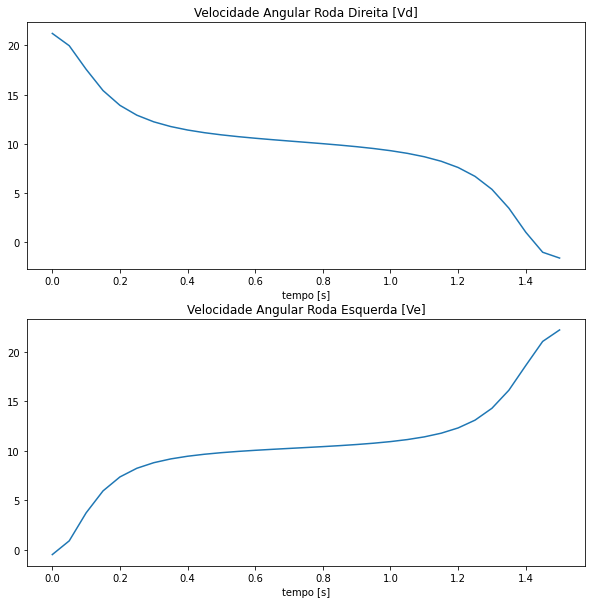

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(t,VelocidadeAngularRodaDireita)
ax1.set_title('Velocidade Angular Roda Direita [Vd]')
ax1.set_xlabel('tempo [s]')
ax2.plot(t,VelocidadeAngularRodaEsquerda)
ax2.set_title('Velocidade Angular Roda Esquerda [Ve]')
ax2.set_xlabel('tempo [s]')


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from RoboPionner import RoboPionner, Simula2, plotaGrafico
from RoboPionnerModeloUm import RoboPionnerModeloUm

In [8]:
#Simulação no Coppelia Robotics
PosicaoRealHistorico = Simula2(VelocidadeAngularRodaDireita,
                                VelocidadeAngularRodaEsquerda,
                                Passo=0.05)

Connected to remote API server
0
1
2
Simulando 96.66666666666667%
Simulation Stopped
Simulation Closed


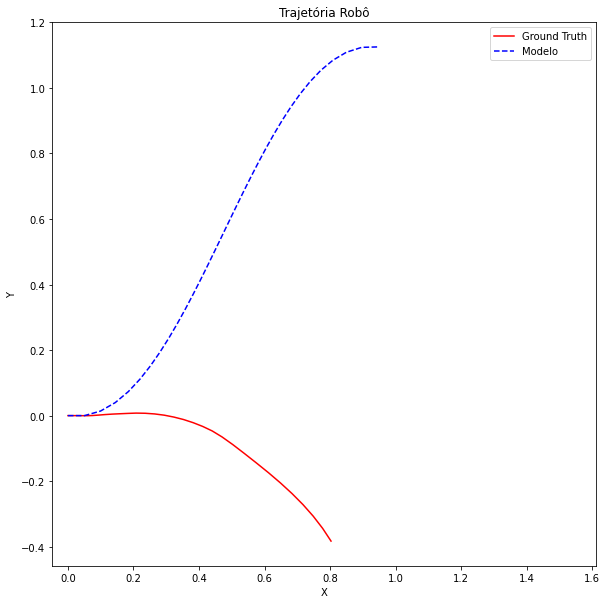

In [9]:
# Calculo do Modelo I
roboUm = RoboPionnerModeloUm()
PosicaoRoboHistorico = roboUm.posicaoRobo

NumeroIteracoes = AngularVelocities.shape[1]

VelocidadeRoboHistorico = np.array([0,0]).reshape((2,1))
for i in range(0,NumeroIteracoes):
    roboUm.velocidadeAngularRodas = [AngularVelocities[0,i],AngularVelocities[1,i]]
    PosicaoNova = roboUm.calculaNovaPosicaoRobo(Passo=0.05)
    VelocidadeNovaRobo = roboUm.velocidadeRobo
    VelocidadeRoboHistorico = np.append(VelocidadeRoboHistorico,VelocidadeNovaRobo,axis=1)
    PosicaoRoboHistorico = np.append(PosicaoRoboHistorico,PosicaoNova,axis=1)

# Desenhando Gráficos
plotaGrafico(PosicaoRoboHistorico,PosicaoRealHistorico)

In [10]:
def Encoder(JointPosition,VariacaAngulo):
    JointPositionAngle = JointPosition[1]
    NovoAngulo = VariacaAngulo + JointPositionAngle
    if NovoAngulo > np.pi:
        NovoAngulo = (NovoAngulo - 2*np.pi) 
    elif (NovoAngulo < -np.pi):
        NovoAngulo = (NovoAngulo + 2*np.pi) 
    else:
        NovoAngulo = NovoAngulo
    return NovoAngulo

In [11]:
Encoder((0,-3,10),0.05*10)

-2.5

In [12]:
-(np.pi-3.3)%np.pi

0.1584073464102067